<a href="https://colab.research.google.com/github/prp021/hello-world/blob/main/PlantsSeedlingClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Try:
Noise removal
Different params

Try to build a model without augmentation, but reduce overfitting using dropout and pooling.
Try black and white images instead of color.

# Plants Seedling Classification

## Background and Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

## Objective

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

## Data Description

This dataset contains images of unique plants belonging to 12 different species.
The data file names are:
images.npy
Label.csv
Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
The goal of the project is to create a classifier capable of determining a plant's species from an image.

## List of Plant species

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet
- Guide to solve the project seamlessly



## Import the libraries

In [115]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
import os

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

from tensorflow.keras import backend

import random

from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend 
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
# Importing all the required sub-modules from Keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split



## Load the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/Colab Notebooks/ComputerVisionProject/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ComputerVisionProject/Labels.csv')

## Overview of the dataset
Let's print the shape of the images and labels

In [4]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


The dataset is composed of 4750 images of 128 x 128 pixels and 3 channels each.

## Plotting images using OpenCV and matplotlib


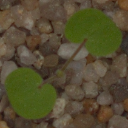

In [5]:
cv2_imshow(images[20])

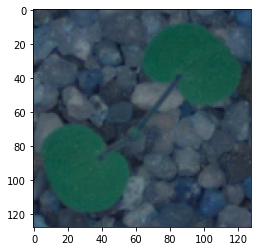

In [6]:
plt.imshow(images[20])


- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- Now we will convert these BGR images to RGB images so we could interpret them easily.

In [7]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

## Exploratory Data Analysis

In [8]:
images[0]

array([[[ 78,  52,  35],
        [ 76,  49,  36],
        [ 69,  45,  31],
        ...,
        [114,  95,  78],
        [110,  93,  76],
        [109,  95,  80]],

       [[ 68,  46,  33],
        [ 73,  50,  37],
        [ 83,  65,  48],
        ...,
        [113,  96,  81],
        [105,  89,  74],
        [109,  95,  83]],

       [[ 68,  50,  34],
        [ 72,  52,  35],
        [101,  85,  70],
        ...,
        [112,  97,  83],
        [108,  94,  79],
        [107,  94,  79]],

       ...,

       [[ 69,  50,  35],
        [ 73,  57,  42],
        [ 72,  57,  42],
        ...,
        [ 92,  76,  60],
        [ 97,  81,  67],
        [ 95,  77,  64]],

       [[ 67,  52,  36],
        [ 78,  63,  48],
        [ 73,  57,  41],
        ...,
        [ 83,  66,  44],
        [ 91,  76,  58],
        [ 90,  74,  57]],

       [[ 70,  58,  44],
        [ 73,  57,  43],
        [ 72,  55,  40],
        ...,
        [ 92,  70,  41],
        [ 97,  78,  55],
        [ 96,  79,  61]]

In [9]:
labels['Label'][0]

'Small-flowered Cranesbill'

In [10]:
#bw_images = []
#for i in range(len(images)):
#  bw_images.append(cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY))
  
#cv2_imshow(bw_images[0])

In [11]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

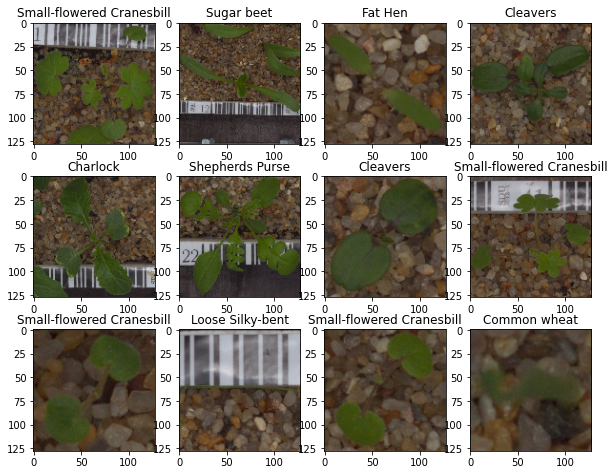

In [12]:
plot_images(images,labels)

Checking for data imbalance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

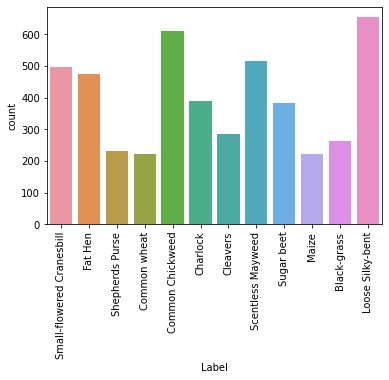

In [13]:
sns.countplot(labels['Label'])
plt.xticks(rotation='vertical')

We can see above that the dataset is not balanced. There are over 600 samples of 'Loose Silky-bent' plants compared to only 200 samples of Maize, Common Wheat or Shepherd's Purse.



## Resizing images
Let us leave the size of the images as they are, since they are relatively small and as the dataset is not too large, model computation should not take too long.


In [14]:
#images_decreased=[]
#height = 64
#width = 64
#dimensions = (width, height)  
#for i in range(len(images)):
#  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

In [15]:
#plt.imshow(images_decreased[20])

## Visualizing images using Gaussian Blur

Let us try to remove unwanted noise from the images using Gaussian Blurring

In [16]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

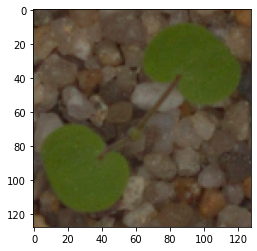

In [17]:
plt.imshow(images[20])

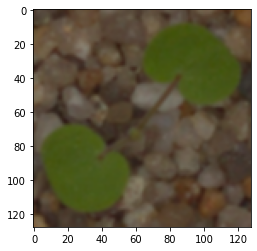

In [18]:
plt.imshow(images_gb[20])

It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

## Model Mask

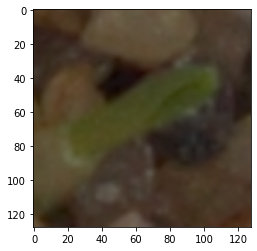

In [19]:
plt.imshow(images_gb[1300])

In [20]:
img1 = cv2.cvtColor(images_gb[1300], cv2.COLOR_BGR2HSV)

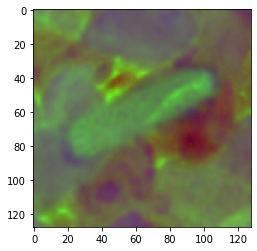

In [21]:
plt.imshow(img1)

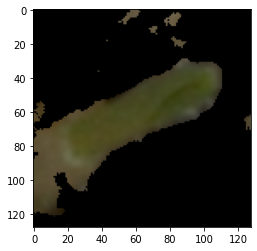

In [22]:
## mask of green (36,25,25) ~ (86, 255,255)
# mask = cv2.inRange(hsv, (36, 25, 255), (86, 255,255))
mask = cv2.inRange(img1, (36, 25, 25), (100, 255,255))

## slice the green
imask = mask>0
green = np.zeros_like(images_gb[1300], np.uint8)
green[imask] = images_gb[1300][imask]

## save 
plt.imshow(green)

In [23]:
images_masked = []
def applyMask(images):
  for i in range(len(images)):
    img = images[i]
    imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    ## slice the green
    mask = cv2.inRange(imghsv, (36, 25, 25), (100, 255,255))
    imask = mask>0
    green = np.zeros_like(img, np.uint8)
    green[imask] = img[imask]
    images_masked.append(green)
  return images_masked

images_masked = applyMask(images_gb)

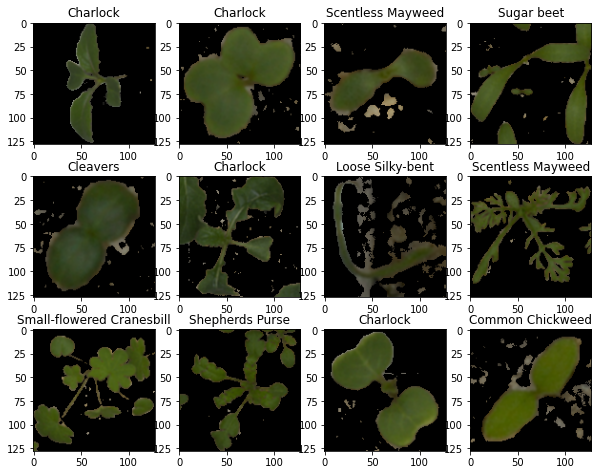

In [24]:
plot_images(np.array(images_masked), labels)

In [25]:
images = images_masked.copy()

## Splitting the dataset
As we have less images in our dataset, we will only use 10% of our data for testing and 90% of our data for training.
We are using the train_test_split() function from scikit-learn. Here, we split the dataset while keeping the test size constant at 0.1. This means that 10% of total data is used for testing, while 90% is used for training.

In [26]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(np.array(images),labels,
    test_size=0.1, shuffle = True, random_state = 1, stratify=labels)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.1, random_state= 1, stratify=y_train) 


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (3847, 128, 128, 3)
X_test shape: (475, 128, 128, 3)
y_train shape: (3847, 1)
y_test shape: (475, 1)
X_val shape: (428, 128, 128, 3)
y val shape: (428, 1)


In [27]:
y_train

,Label
2505,Cleavers
3894,Black-grass
4363,Loose Silky-bent
630,Fat Hen
514,Fat Hen
...,...
2377,Charlock
1020,Shepherds Purse
614,Fat Hen
952,Fat Hen


In [28]:
y_train.value_counts()

Label                    
Loose Silky-bent             530
Common Chickweed             495
Scentless Mayweed            418
Small-flowered Cranesbill    402
Fat Hen                      384
Charlock                     316
Sugar beet                   312
Cleavers                     232
Black-grass                  213
Shepherds Purse              187
Common wheat                 179
Maize                        179
dtype: int64

## Data Normalization
Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.


In [29]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [30]:
print(X_train_normalized.shape)
print(X_val_normalized.shape)
print(X_test_normalized.shape)

(3847, 128, 128, 3)
(428, 128, 128, 3)
(475, 128, 128, 3)


## Encoding the target labels
Convert labels from names to one hot vectors

In [31]:
# Convert labels from names to one hot vectors.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.fit_transform(y_val)
y_test_encoded=enc.transform(y_test)

In [32]:
print(y_train_encoded.shape)
print(y_val_encoded.shape)
print(y_test_encoded.shape)

(3847, 12)
(428, 12)
(475, 12)


## Model Evaluation

Accuracy is not a good measure of model performance when the dataset is imbalanced. We will focus on F1 score when comparing models. **But if we can address the imbalance using oversampling, perhaps accuracy can be used?**

Let us define a function that will generate and print a confusion matrix and classification report based on model predictions.

In [33]:
def printConfusionMatrixAndReport(y_pred):
  # Obtaining the categorical values from y_test_encoded and y_pred
  y_pred_vals=np.argmax(y_pred,axis=1)
  y_test_vals=np.argmax(y_test_encoded,axis=1)

  # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
  confusion_matrix = tf.math.confusion_matrix(y_test_vals,y_pred_vals)
  f, ax = plt.subplots(figsize=(10, 8))
  sns.heatmap(
      confusion_matrix,
      annot=True,
      linewidths=.4,
      fmt="d",
      square=True,
      ax=ax
  )
  plt.show()

  print(classification_report(y_test_vals, y_pred_vals))

In [34]:
# function to plot train accuracy vs validation accuracy
def plotModelAccuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

In [35]:
# function to plot train loss vs validation loss
def plotLossCurves(model, history):
  # Capturing loss history per epoch
  hist  = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  # Plotting loss at different epochs
  plt.plot(hist['loss'])
  plt.plot(hist['val_loss'])
  plt.legend(("train" , "valid") , loc =0)
  #Printing results
  plt.show()

## Model Building - Convolutional Neural Network (CNN)
Let's create a CNN model sequentially, where we will be adding the layers one after another.



First, we need to clear the previous model's history from the session.

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Let's fix the seed again after clearing the backend. Let's set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow to be able to reproduce the same results every time we run the code.

In [36]:
# set defaults
epochs = 30
batch_size = 64
random_seed = 1

In [37]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

### Model 1

Now, let's build a CNN Model with the following 2 main parts -

- The Feature Extraction layers which are comprised of convolutional and pooling layers.
- The Fully Connected classification layers for prediction.


In [38]:
# Intializing a sequential model
model1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model1.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 16)                5

### Fitting the model on the train data


In [39]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model
history1=model1.fit(X_train_normalized, 
          y_train_encoded,  
          epochs=epochs, shuffle=True,
          batch_size=batch_size,validation_data=[X_val_normalized, y_val_encoded], callbacks=[es, mc])  

Epoch 1/30
61/61 [==============================] - ETA: 0s - loss: 2.3405 - accuracy: 0.1684
Epoch 1: val_accuracy improved from -inf to 0.27103, saving model to best_model.h5
61/61 [==============================] - 14s 48ms/step - loss: 2.3405 - accuracy: 0.1684 - val_loss: 2.0944 - val_accuracy: 0.2710
Epoch 2/30
59/61 [============================>.] - ETA: 0s - loss: 2.0764 - accuracy: 0.2331
Epoch 2: val_accuracy improved from 0.27103 to 0.37150, saving model to best_model.h5
61/61 [==============================] - 2s 39ms/step - loss: 2.0754 - accuracy: 0.2329 - val_loss: 1.8910 - val_accuracy: 0.3715
Epoch 3/30
59/61 [============================>.] - ETA: 0s - loss: 1.8573 - accuracy: 0.3247
Epoch 3: val_accuracy improved from 0.37150 to 0.44393, saving model to best_model.h5
61/61 [==============================] - 2s 39ms/step - loss: 1.8584 - accuracy: 0.3257 - val_loss: 1.7259 - val_accuracy: 0.4439
Epoch 4/30
59/61 [============================>.] - ETA: 0s - loss: 1.73

### Model Evaluation on train data

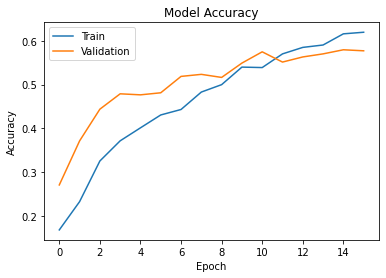

In [40]:
plotModelAccuracy(history1)

**Observations**

We can see from the above plot that the training accuracy and the validation accuracy is not good.
The model seems to overfit on the data.


### Evaluating the model on test data

In [41]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.5426 - accuracy: 0.5516 - 374ms/epoch - 25ms/step


### Generating the predictions using test data

In [42]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)
y_pred

array([[9.1887381e-13, 3.7051793e-09, 3.2675794e-06, ..., 9.2272941e-08,
        9.9995232e-01, 1.7444531e-06],
       [2.7553974e-06, 5.5084521e-01, 3.4482080e-01, ..., 5.0070216e-03,
        9.3714163e-02, 4.1584372e-05],
       [1.4102180e-06, 5.4565849e-06, 2.8372084e-05, ..., 5.7596043e-02,
        1.8929773e-03, 1.8662261e-02],
       ...,
       [3.0886003e-08, 6.2250680e-01, 3.0924869e-01, ..., 7.6301640e-04,
        6.6977829e-02, 2.4518131e-06],
       [4.6268913e-17, 9.5519162e-11, 4.5769841e-09, ..., 3.1161913e-01,
        3.4908958e-02, 9.9754580e-08],
       [2.8354391e-03, 3.6205154e-05, 6.0358841e-04, ..., 1.8007789e-02,
        1.3096810e-04, 7.5229533e-02]], dtype=float32)

### Plotting the Confusion Matrix
- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

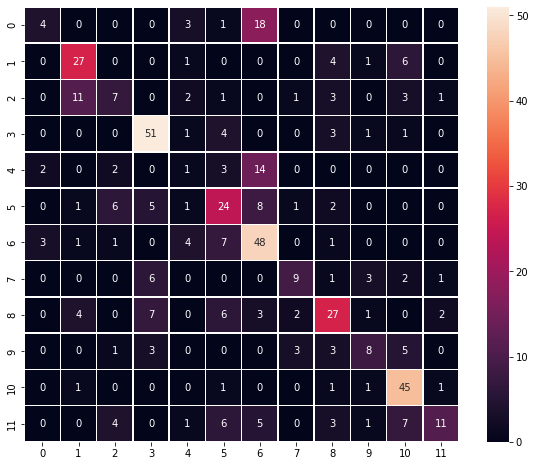

              precision    recall  f1-score   support

           0       0.44      0.15      0.23        26
           1       0.60      0.69      0.64        39
           2       0.33      0.24      0.28        29
           3       0.71      0.84      0.77        61
           4       0.07      0.05      0.06        22
           5       0.45      0.50      0.48        48
           6       0.50      0.74      0.60        65
           7       0.56      0.41      0.47        22
           8       0.56      0.52      0.54        52
           9       0.50      0.35      0.41        23
          10       0.65      0.90      0.76        50
          11       0.69      0.29      0.41        38

    accuracy                           0.55       475
   macro avg       0.51      0.47      0.47       475
weighted avg       0.54      0.55      0.53       475



In [43]:
printConfusionMatrixAndReport(y_pred)

**Observations**

We observe that some of the classes are not predicted correctly.
In comparison to the rest, we can see that classes 0,3, and 4 are well classified.
We can also observe that classes 1,2,5,7 and 9 are mostly misclassified.

# Model 1 training on oversampled data

In [44]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

## Label Encoding for OverSampling

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_val_le = le.fit_transform(y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
from collections import Counter
print(y_train_le.shape)
print(y_val_le.shape)
print(Counter(y_train_le))
print(Counter(y_val_le))

(3847,)
(428,)
Counter({6: 530, 3: 495, 8: 418, 10: 402, 5: 384, 1: 316, 11: 312, 2: 232, 0: 213, 9: 187, 7: 179, 4: 179})
Counter({6: 59, 3: 55, 8: 46, 10: 44, 5: 43, 1: 35, 11: 35, 2: 26, 0: 24, 9: 21, 7: 20, 4: 20})


## Oversampling using RandomOverSampler

In [47]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_train_ros, y_train_ros = ros.fit_resample(X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]), y_train_le)
X_val_ros, y_val_ros = ros.fit_resample(X_val.reshape(X_val.shape[0], X_val.shape[1]*X_val.shape[2]*X_val.shape[3]), y_val_le)

In [48]:
# print number of samples in X train and val datasets
print(X_train_ros.shape)
X_train_ros = X_train_ros.reshape(X_train_ros.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3])
print(X_train_ros.shape)
print(X_val_ros.shape)
X_val_ros = X_val_ros.reshape(X_val_ros.shape[0], X_val.shape[1], X_val.shape[2], X_val.shape[3])
print(X_val_ros.shape)

# print class counts y 
print(Counter(y_train_ros))
print(Counter(y_val_ros))

# print number of samples in y train and val datasets
print(y_train_ros.shape)
y_train_ros = y_train_ros.reshape(y_train_ros.shape[0],1)
print(y_train_ros.shape)
print(y_val_ros.shape)
y_val_ros = y_val_ros.reshape(y_val_ros.shape[0],1)
print(y_val_ros.shape)

(6360, 49152)
(6360, 128, 128, 3)
(708, 49152)
(708, 128, 128, 3)
Counter({2: 530, 0: 530, 6: 530, 5: 530, 1: 530, 8: 530, 3: 530, 9: 530, 10: 530, 11: 530, 7: 530, 4: 530})
Counter({1: 59, 7: 59, 9: 59, 2: 59, 10: 59, 3: 59, 6: 59, 8: 59, 4: 59, 5: 59, 11: 59, 0: 59})
(6360,)
(6360, 1)
(708,)
(708, 1)


## Encoding the target labels
Convert labels from names to one hot vectors

In [49]:
# Convert labels from names to one hot vectors.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_ros_encoded = enc.fit_transform(y_train_ros)
y_val_ros_encoded = enc.fit_transform(y_val_ros)

## Data Normalization
Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.


In [50]:
# Normalizing the image pixels
X_train_ros_normalized = X_train_ros.astype('float32')/255.0
X_val_ros_normalized = X_val_ros.astype('float32')/255.0

In [51]:
print(X_train_ros_normalized.shape)
print(X_val_ros_normalized.shape)
print(X_test_normalized.shape)

(6360, 128, 128, 3)
(708, 128, 128, 3)
(475, 128, 128, 3)


In [52]:
# Intializing a sequential model
model1_over = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1_over.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model1_over.add(MaxPooling2D((2, 2), padding = 'same'))

model1_over.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1_over.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1_over.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model1_over.add(Dense(16, activation='relu'))
model1_over.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model1_over.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model1_over.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1_over.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 16)                5

## Fitting the model on oversampled data

In [53]:
# Fitting the model with 20 epochs and validation_split as 10%
history1_over=model1_over.fit(X_train_ros_normalized, 
          y_train_ros_encoded,  
          epochs=epochs, shuffle=True,
          batch_size=batch_size, validation_data=[X_val_ros_normalized, y_val_ros_encoded],callbacks=[es, mc])  

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 2.2761 - accuracy: 0.1888
Epoch 1: val_accuracy did not improve from 0.57944
100/100 [==============================] - 5s 45ms/step - loss: 2.2761 - accuracy: 0.1888 - val_loss: 1.9510 - val_accuracy: 0.3630
Epoch 2/30
 99/100 [============================>.] - ETA: 0s - loss: 1.8184 - accuracy: 0.3786
Epoch 2: val_accuracy did not improve from 0.57944
100/100 [==============================] - 4s 39ms/step - loss: 1.8178 - accuracy: 0.3786 - val_loss: 1.6435 - val_accuracy: 0.5014
Epoch 3/30
 99/100 [============================>.] - ETA: 0s - loss: 1.4853 - accuracy: 0.4740
Epoch 3: val_accuracy did not improve from 0.57944
100/100 [==============================] - 4s 39ms/step - loss: 1.4847 - accuracy: 0.4744 - val_loss: 1.6221 - val_accuracy: 0.4350
Epoch 4/30
 99/100 [============================>.] - ETA: 0s - loss: 1.2896 - accuracy: 0.5461
Epoch 4: val_accuracy did not improve from 0.57944
100/100 [=======

### Model Evaluation on train data

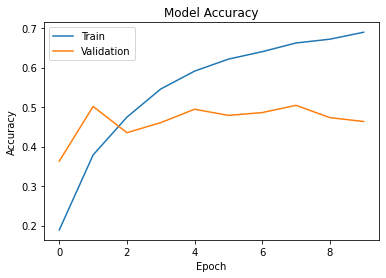

In [54]:
plotModelAccuracy(history1_over)

**Observations**

We can see from the above plot that the training accuracy of the model was good but the validation accuracy was not good.
The model seems to overfit on the data.


### Evaluating the model on test data

In [55]:
accuracy = model1_over.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.6496 - accuracy: 0.5663 - 143ms/epoch - 10ms/step


### Generating the predictions using test data

In [56]:
# Here we would get the output as probablities for each category
y_pred=model1_over.predict(X_test_normalized)

### Plotting the Confusion Matrix
- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

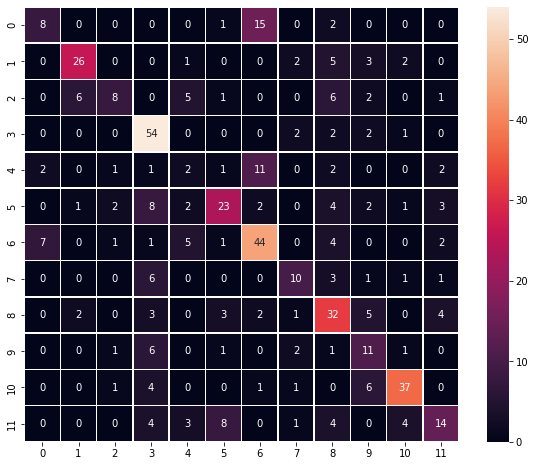

              precision    recall  f1-score   support

           0       0.47      0.31      0.37        26
           1       0.74      0.67      0.70        39
           2       0.57      0.28      0.37        29
           3       0.62      0.89      0.73        61
           4       0.11      0.09      0.10        22
           5       0.59      0.48      0.53        48
           6       0.59      0.68      0.63        65
           7       0.53      0.45      0.49        22
           8       0.49      0.62      0.55        52
           9       0.34      0.48      0.40        23
          10       0.79      0.74      0.76        50
          11       0.52      0.37      0.43        38

    accuracy                           0.57       475
   macro avg       0.53      0.50      0.51       475
weighted avg       0.57      0.57      0.56       475



In [57]:
printConfusionMatrixAndReport(y_pred)

**Observations**

We observe that some of the classes are not predicted correctly.
In comparison to the rest, we can see that classes 0,3, and 4 are well classified.
We can also observe that classes 1,2,5,7 and 9 are mostly misclassified.

### Model 2

Lets try to build another CNN model with more layers added to the model.

In [58]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

In [59]:
# initialized a sequential model
model2 = Sequential()
# adding first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of images
model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
# adding max pooling to reduce the size of output of first conv layer
#model2.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding second conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
#model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding third conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
#model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
#model2.add(Dropout(0.3))

# adding forth conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
#model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
#model2.add(Dropout(0.3))
model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())
# adding first fully connected dense layer with 1024 neurons 
model2.add(Dense(64, activation = "relu"))
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2.add(Dropout(0.5))
# adding second fully connected dense layer with 512 neurons 
model2.add(Dense(32, activation = "relu"))
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2.add(Dropout(0.5))

# adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem with 12 classes.
model2.add(Dense(12, activation = "softmax"))

optimizer = Adam(lr=0.001)
model2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 flatten (Flatten)           (None, 524288)            0         
                                                                 
 dense (Dense)               (None, 64)                3

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [60]:
history2=model2.fit(X_train_ros_normalized, 
          y_train_ros_encoded,  
          epochs=epochs, 
          batch_size=batch_size,validation_data=[X_val_ros_normalized, y_val_ros_encoded],callbacks=[es, mc],use_multiprocessing=True)

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 1.8655 - accuracy: 0.3462
Epoch 1: val_accuracy did not improve from 0.57944
100/100 [==============================] - 14s 130ms/step - loss: 1.8655 - accuracy: 0.3462 - val_loss: 1.7686 - val_accuracy: 0.4223
Epoch 2/30
100/100 [==============================] - ETA: 0s - loss: 0.6353 - accuracy: 0.7973
Epoch 2: val_accuracy did not improve from 0.57944
100/100 [==============================] - 12s 125ms/step - loss: 0.6353 - accuracy: 0.7973 - val_loss: 2.0090 - val_accuracy: 0.4986
Epoch 3/30
100/100 [==============================] - ETA: 0s - loss: 0.0856 - accuracy: 0.9752
Epoch 3: val_accuracy did not improve from 0.57944
100/100 [==============================] - 13s 125ms/step - loss: 0.0856 - accuracy: 0.9752 - val_loss: 3.3795 - val_accuracy: 0.4520
Epoch 4/30
100/100 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.9970
Epoch 4: val_accuracy did not improve from 0.57944
100/100 [=

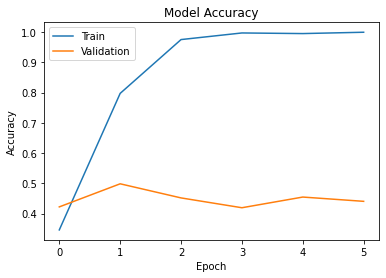

In [61]:
plotModelAccuracy(history2)

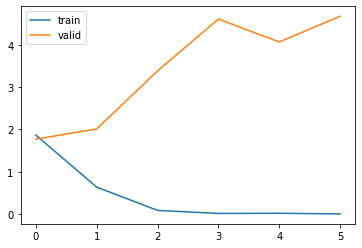

In [62]:
plotLossCurves(model2, history2)

**Observations**

We can see from the above plot that the training accuracy of the model was good but the validation accuracy was not good.
The model seems to overfit on the data.


### Evaluating the model on test data

In [63]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 3.1516 - accuracy: 0.5579 - 583ms/epoch - 39ms/step


### Generating the predictions using test data

In [64]:
# Here we would get the output as probablities for each category
y_pred=model2.predict(X_test_normalized)
y_pred

array([[1.2732503e-06, 1.9147035e-07, 1.8529040e-06, ..., 4.3677769e-06,
        9.6762037e-01, 7.0992797e-07],
       [1.6462268e-10, 3.3143476e-02, 2.8908462e-03, ..., 6.5735644e-03,
        9.4987553e-01, 2.5314265e-03],
       [3.8493241e-03, 1.5429104e-06, 3.8777671e-03, ..., 1.5623504e-04,
        5.8272153e-06, 5.2078809e-07],
       ...,
       [3.2080974e-10, 9.6693927e-01, 3.0666025e-04, ..., 2.7384210e-06,
        2.1460892e-04, 2.5568527e-04],
       [1.5173774e-14, 5.8243894e-20, 4.4392743e-25, ..., 7.3971474e-05,
        1.4644550e-08, 3.6558659e-20],
       [2.3756204e-06, 8.2732884e-15, 7.4431359e-06, ..., 5.3528260e-07,
        1.6427521e-11, 1.2902956e-07]], dtype=float32)

### Plotting the Confusion Matrix
- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

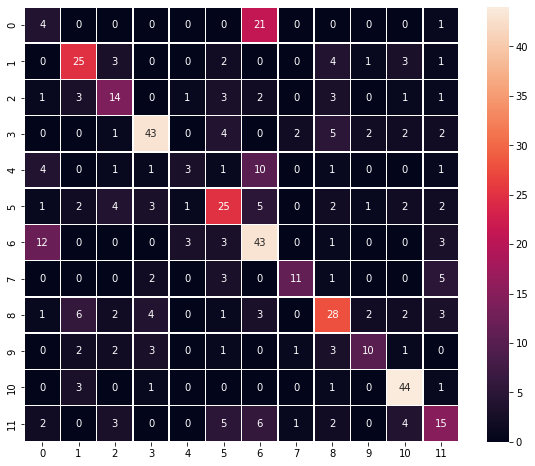

              precision    recall  f1-score   support

           0       0.16      0.15      0.16        26
           1       0.61      0.64      0.62        39
           2       0.47      0.48      0.47        29
           3       0.75      0.70      0.73        61
           4       0.38      0.14      0.20        22
           5       0.52      0.52      0.52        48
           6       0.48      0.66      0.55        65
           7       0.73      0.50      0.59        22
           8       0.55      0.54      0.54        52
           9       0.62      0.43      0.51        23
          10       0.75      0.88      0.81        50
          11       0.43      0.39      0.41        38

    accuracy                           0.56       475
   macro avg       0.54      0.50      0.51       475
weighted avg       0.56      0.56      0.55       475



In [65]:
printConfusionMatrixAndReport(y_pred)

**Observations**

We observe that some of the classes are not predicted correctly.
In comparison to the rest, we can see that classes 0,3, and 4 are well classified.
We can also observe that classes 1,2,5,7 and 9 are mostly misclassified.

## Model 2a

Lets try to build another CNN model with more layers added to the model.

In [101]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

In [102]:
# initialized a sequential model
model2a = Sequential()
# adding first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of images
model2a.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
# adding max pooling to reduce the size of output of first conv layer
model2a.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding second conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2a.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model2a.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding third conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2a.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model2a.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model2a.add(Dropout(0.3))

# adding forth conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2a.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model2a.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model2a.add(Dropout(0.3))
model2a.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model2a.add(Flatten())
# adding first fully connected dense layer with 1024 neurons 
model2a.add(Dense(64, activation = "relu"))
model2a.add(BatchNormalization())
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2a.add(Dropout(0.5))
# adding second fully connected dense layer with 512 neurons 
model2a.add(Dense(32, activation = "relu"))
model2a.add(BatchNormalization())
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2a.add(Dropout(0.5))

# adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem with 12 classes.
model2a.add(Dense(12, activation = "softmax"))

optimizer = Adam(lr=0.001)
model2a.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

model2a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [103]:
history2a=model2a.fit(X_train_ros_normalized, 
          y_train_ros_encoded,  
          epochs=epochs, 
          batch_size=batch_size,validation_data=[X_val_ros_normalized, y_val_ros_encoded],callbacks=[es, mc],use_multiprocessing=True)

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 2.0955 - accuracy: 0.2667
Epoch 1: val_accuracy did not improve from 0.74859
100/100 [==============================] - 17s 154ms/step - loss: 2.0955 - accuracy: 0.2667 - val_loss: 2.0780 - val_accuracy: 0.2825
Epoch 2/30
100/100 [==============================] - ETA: 0s - loss: 1.5683 - accuracy: 0.4431
Epoch 2: val_accuracy did not improve from 0.74859
100/100 [==============================] - 15s 152ms/step - loss: 1.5683 - accuracy: 0.4431 - val_loss: 1.6370 - val_accuracy: 0.4068
Epoch 3/30
100/100 [==============================] - ETA: 0s - loss: 1.1176 - accuracy: 0.6332
Epoch 3: val_accuracy did not improve from 0.74859
100/100 [==============================] - 15s 152ms/step - loss: 1.1176 - accuracy: 0.6332 - val_loss: 1.9281 - val_accuracy: 0.2486
Epoch 4/30
100/100 [==============================] - ETA: 0s - loss: 0.7986 - accuracy: 0.7420
Epoch 4: val_accuracy did not improve from 0.74859
100/100 [=

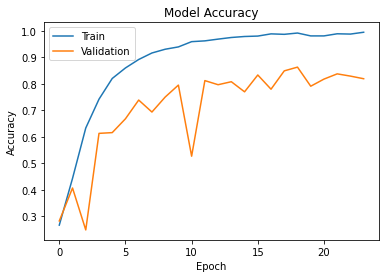

In [104]:
plotModelAccuracy(history2a)

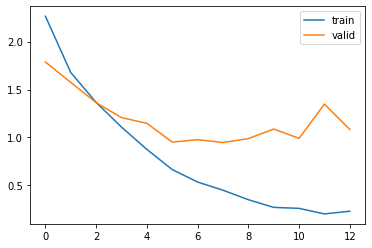

In [99]:
plotLossCurves(model2a, history2a)

**Observations**

We can see from the above plot that the training accuracy of the model was good but the validation accuracy was not good.
The model seems to overfit on the data.


### Evaluating the model on test data

In [105]:
accuracy = model2a.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 0.6607 - accuracy: 0.8337 - 1s/epoch - 97ms/step


### Generating the predictions using test data

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model2a.predict(X_test_normalized)
y_pred

array([[9.96566563e-09, 7.64428236e-08, 2.29762573e-08, ...,
        6.11524285e-07, 9.99614596e-01, 9.62389458e-05],
       [1.72775908e-11, 9.41423655e-01, 7.31131368e-05, ...,
        1.65186310e-03, 6.79130026e-04, 3.87674845e-05],
       [1.42163099e-05, 4.75357531e-09, 1.89015064e-02, ...,
        4.69623229e-09, 1.61770337e-11, 1.19241633e-01],
       ...,
       [2.74533507e-10, 5.07158995e-01, 1.93128407e-01, ...,
        1.00211604e-04, 5.57811325e-03, 2.33516052e-01],
       [8.95763238e-12, 5.39059388e-19, 8.24202035e-21, ...,
        2.95882963e-09, 1.83328743e-12, 1.03916933e-14],
       [5.54782730e-07, 1.59841866e-13, 9.50168760e-05, ...,
        1.89811750e-10, 4.68310901e-09, 7.94099833e-06]], dtype=float32)

### Plotting the Confusion Matrix
- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

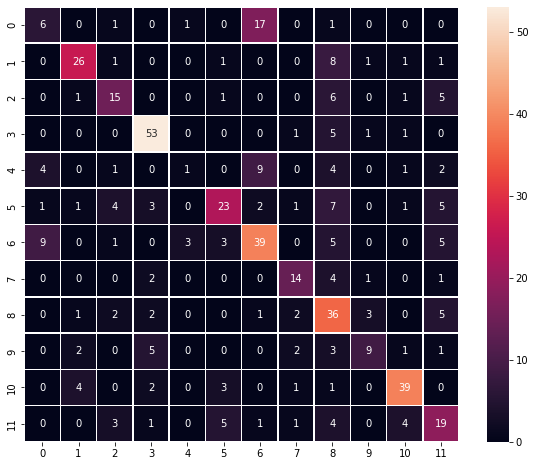

              precision    recall  f1-score   support

           0       0.30      0.23      0.26        26
           1       0.74      0.67      0.70        39
           2       0.54      0.52      0.53        29
           3       0.78      0.87      0.82        61
           4       0.20      0.05      0.07        22
           5       0.64      0.48      0.55        48
           6       0.57      0.60      0.58        65
           7       0.64      0.64      0.64        22
           8       0.43      0.69      0.53        52
           9       0.60      0.39      0.47        23
          10       0.80      0.78      0.79        50
          11       0.43      0.50      0.46        38

    accuracy                           0.59       475
   macro avg       0.55      0.53      0.53       475
weighted avg       0.59      0.59      0.58       475



In [ ]:
printConfusionMatrixAndReport(y_pred)

**Observations**

We observe that some of the classes are not predicted correctly.
In comparison to the rest, we can see that classes 0,3, and 4 are well classified.
We can also observe that classes 1,2,5,7 and 9 are mostly misclassified.

## Model 2b

Lets try to build another CNN model with more layers added to the model.

In [130]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

In [131]:
# initialized a sequential model
model2b = Sequential()
# adding first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of images
model2b.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
# adding max pooling to reduce the size of output of first conv layer
model2b.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding second conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2b.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model2b.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding third conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2b.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model2b.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model2b.add(Dropout(0.3))
model2b.add(BatchNormalization())
# adding forth conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2b.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model2b.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model2b.add(Dropout(0.3))
model2b.add(BatchNormalization())
model2b.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model2b.add(Flatten())
# adding first fully connected dense layer with 1024 neurons 
model2b.add(Dense(64, activation = "relu"))
model2b.add(BatchNormalization())
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2a.add(Dropout(0.5))
# adding second fully connected dense layer with 512 neurons 
model2b.add(Dense(32, activation = "relu"))
model2b.add(BatchNormalization())
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2a.add(Dropout(0.5))

# adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem with 12 classes.
model2b.add(Dense(12, activation = "softmax"))

optimizer = Adam(lr=0.01)
model2b.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
model2b.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [132]:
# add callback to reduce LR rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5,min_lr=0.0001,mode='auto')
history2b=model2b.fit(X_train_ros_normalized, 
          y_train_ros_encoded,  
          epochs=epochs, 
          batch_size=batch_size,validation_data=[X_val_ros_normalized, y_val_ros_encoded],callbacks=[reduce_lr],use_multiprocessing=True)

Epoch 1/30
100/100 [==============================] - 18s 171ms/step - loss: 1.7281 - accuracy: 0.3706 - val_loss: 11.1244 - val_accuracy: 0.0890 - lr: 0.0100
Epoch 2/30
100/100 [==============================] - 15s 149ms/step - loss: 1.0576 - accuracy: 0.6069 - val_loss: 3.9186 - val_accuracy: 0.2825 - lr: 0.0100
Epoch 3/30
100/100 [==============================] - 15s 149ms/step - loss: 0.7843 - accuracy: 0.7189 - val_loss: 2.4412 - val_accuracy: 0.4816 - lr: 0.0100
Epoch 4/30
100/100 [==============================] - 15s 150ms/step - loss: 0.5976 - accuracy: 0.7819 - val_loss: 3.9515 - val_accuracy: 0.3107 - lr: 0.0100
Epoch 5/30
100/100 [==============================] - 15s 150ms/step - loss: 0.4988 - accuracy: 0.8187 - val_loss: 1.2021 - val_accuracy: 0.6271 - lr: 0.0100
Epoch 6/30
100/100 [==============================] - 15s 150ms/step - loss: 0.4088 - accuracy: 0.8541 - val_loss: 0.9337 - val_accuracy: 0.7260 - lr: 0.0100
Epoch 7/30
100/100 [==============================]

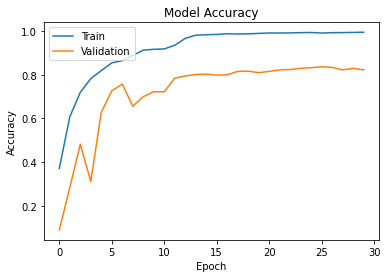

In [133]:
plotModelAccuracy(history2b)

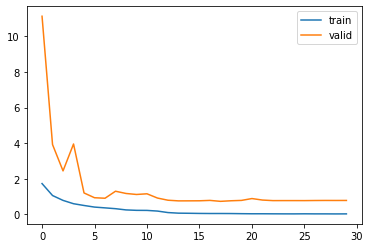

In [134]:
plotLossCurves(model2b, history2b)

**Observations**

We can see from the above plot that the training accuracy of the model was good but the validation accuracy was not good.
The model seems to overfit on the data.


### Evaluating the model on test data

In [135]:
accuracy = model2b.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 2s - loss: 0.5705 - accuracy: 0.8463 - 2s/epoch - 136ms/step


### Generating the predictions using test data

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model2b.predict(X_test_normalized)
y_pred

array([[9.96566563e-09, 7.64428236e-08, 2.29762573e-08, ...,
        6.11524285e-07, 9.99614596e-01, 9.62389458e-05],
       [1.72775908e-11, 9.41423655e-01, 7.31131368e-05, ...,
        1.65186310e-03, 6.79130026e-04, 3.87674845e-05],
       [1.42163099e-05, 4.75357531e-09, 1.89015064e-02, ...,
        4.69623229e-09, 1.61770337e-11, 1.19241633e-01],
       ...,
       [2.74533507e-10, 5.07158995e-01, 1.93128407e-01, ...,
        1.00211604e-04, 5.57811325e-03, 2.33516052e-01],
       [8.95763238e-12, 5.39059388e-19, 8.24202035e-21, ...,
        2.95882963e-09, 1.83328743e-12, 1.03916933e-14],
       [5.54782730e-07, 1.59841866e-13, 9.50168760e-05, ...,
        1.89811750e-10, 4.68310901e-09, 7.94099833e-06]], dtype=float32)

### Plotting the Confusion Matrix
- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

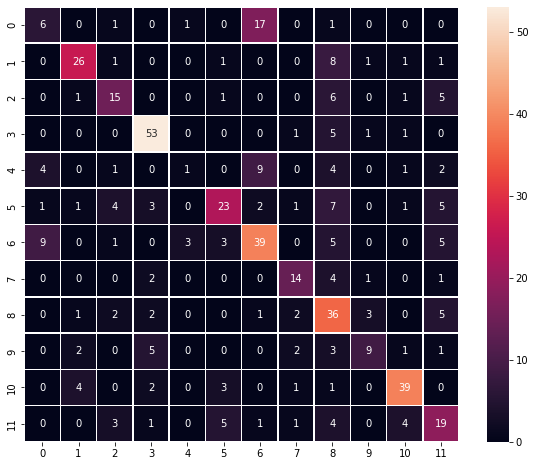

              precision    recall  f1-score   support

           0       0.30      0.23      0.26        26
           1       0.74      0.67      0.70        39
           2       0.54      0.52      0.53        29
           3       0.78      0.87      0.82        61
           4       0.20      0.05      0.07        22
           5       0.64      0.48      0.55        48
           6       0.57      0.60      0.58        65
           7       0.64      0.64      0.64        22
           8       0.43      0.69      0.53        52
           9       0.60      0.39      0.47        23
          10       0.80      0.78      0.79        50
          11       0.43      0.50      0.46        38

    accuracy                           0.59       475
   macro avg       0.55      0.53      0.53       475
weighted avg       0.59      0.59      0.58       475



In [ ]:
printConfusionMatrixAndReport(y_pred)

**Observations**

We observe that some of the classes are not predicted correctly.
In comparison to the rest, we can see that classes 0,3, and 4 are well classified.
We can also observe that classes 1,2,5,7 and 9 are mostly misclassified.

## Model 2c

Lets try to build another CNN model with more layers added to the model.

In [142]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

In [143]:
# initialized a sequential model
model2c = Sequential()
# adding first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of images
model2c.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
# adding max pooling to reduce the size of output of first conv layer
model2c.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting
model2c.add(Dropout(0.1))
model2c.add(BatchNormalization())

# adding second conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2c.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model2c.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting
model2c.add(Dropout(0.1))
model2c.add(BatchNormalization())

# adding third conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2c.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model2c.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model2c.add(Dropout(0.1))
model2c.add(BatchNormalization())
# adding forth conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2c.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model2c.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model2c.add(Dropout(0.1))
model2c.add(BatchNormalization())
model2c.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model2c.add(Flatten())
# adding first fully connected dense layer with 1024 neurons 
model2c.add(Dense(64, activation = "relu"))
model2c.add(BatchNormalization())
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2a.add(Dropout(0.5))
# adding second fully connected dense layer with 512 neurons 
model2c.add(Dense(32, activation = "relu"))
model2c.add(BatchNormalization())
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2a.add(Dropout(0.5))

# adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem with 12 classes.
model2c.add(Dense(12, activation = "softmax"))

optimizer = Adam(lr=0.01)
model2c.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
model2c.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 256)       0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 256)      1024      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [144]:
# add callback to reduce LR rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5,min_lr=0.0001,mode='auto')
history2c=model2c.fit(X_train_ros_normalized, 
          y_train_ros_encoded,  
          epochs=epochs, 
          batch_size=batch_size,validation_data=[X_val_ros_normalized, y_val_ros_encoded],callbacks=[reduce_lr],use_multiprocessing=True)

Epoch 1/30
100/100 [==============================] - 19s 181ms/step - loss: 1.4458 - accuracy: 0.4833 - val_loss: 19.6667 - val_accuracy: 0.1017 - lr: 0.0100
Epoch 2/30
100/100 [==============================] - 18s 178ms/step - loss: 0.7984 - accuracy: 0.7058 - val_loss: 4.3909 - val_accuracy: 0.1879 - lr: 0.0100
Epoch 3/30
100/100 [==============================] - 18s 178ms/step - loss: 0.5387 - accuracy: 0.8053 - val_loss: 7.5284 - val_accuracy: 0.1398 - lr: 0.0100
Epoch 4/30
100/100 [==============================] - 18s 178ms/step - loss: 0.3894 - accuracy: 0.8580 - val_loss: 2.9155 - val_accuracy: 0.3376 - lr: 0.0100
Epoch 5/30
100/100 [==============================] - 18s 179ms/step - loss: 0.2986 - accuracy: 0.8917 - val_loss: 1.4133 - val_accuracy: 0.6483 - lr: 0.0100
Epoch 6/30
100/100 [==============================] - 18s 179ms/step - loss: 0.2493 - accuracy: 0.9091 - val_loss: 1.4471 - val_accuracy: 0.6794 - lr: 0.0100
Epoch 7/30
100/100 [==============================]

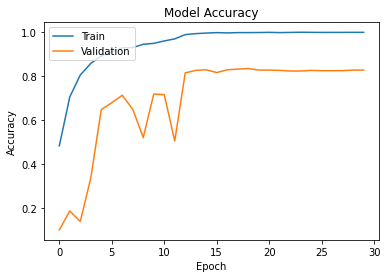

In [146]:
plotModelAccuracy(history2c)

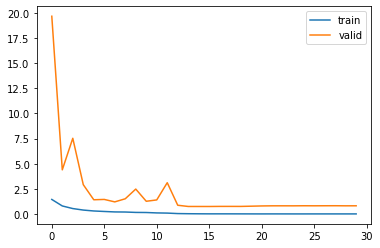

In [147]:
plotLossCurves(model2c, history2c)

**Observations**

We can see from the above plot that the training accuracy of the model was good but the validation accuracy was not good.
The model seems to overfit on the data.


### Evaluating the model on test data

In [150]:
accuracy = model2c.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.5590 - accuracy: 0.8737 - 365ms/epoch - 24ms/step


### Generating the predictions using test data

In [151]:
# Here we would get the output as probablities for each category
y_pred=model2c.predict(X_test_normalized)
y_pred

array([[1.9861483e-03, 1.2202472e-08, 1.0862993e-06, ..., 6.4502490e-07,
        9.6697442e-02, 3.1145919e-05],
       [2.3878671e-05, 1.3820297e-03, 2.7845362e-03, ..., 4.6043724e-01,
        5.3470212e-01, 7.0334937e-07],
       [3.4418197e-06, 2.3437964e-07, 4.5103081e-09, ..., 1.0674979e-06,
        2.5346919e-06, 3.6936708e-08],
       ...,
       [1.0707803e-12, 1.0000000e+00, 8.6557039e-11, ..., 4.3019375e-13,
        8.1179695e-11, 1.0163137e-11],
       [1.4611010e-06, 1.0055977e-09, 1.6364575e-09, ..., 5.4442236e-08,
        1.7934327e-07, 1.2445881e-09],
       [6.8711379e-04, 5.3178566e-03, 5.6524891e-01, ..., 2.5851054e-03,
        2.0775908e-04, 4.0983197e-01]], dtype=float32)

### Plotting the Confusion Matrix
- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

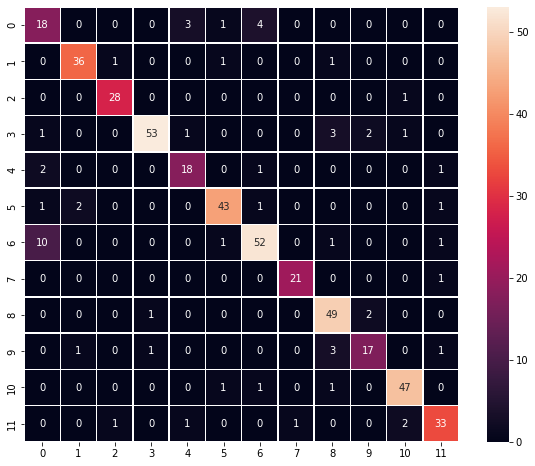

              precision    recall  f1-score   support

           0       0.56      0.69      0.62        26
           1       0.92      0.92      0.92        39
           2       0.93      0.97      0.95        29
           3       0.96      0.87      0.91        61
           4       0.78      0.82      0.80        22
           5       0.91      0.90      0.91        48
           6       0.88      0.80      0.84        65
           7       0.95      0.95      0.95        22
           8       0.84      0.94      0.89        52
           9       0.81      0.74      0.77        23
          10       0.92      0.94      0.93        50
          11       0.87      0.87      0.87        38

    accuracy                           0.87       475
   macro avg       0.86      0.87      0.86       475
weighted avg       0.88      0.87      0.87       475



In [152]:
printConfusionMatrixAndReport(y_pred)

**Observations**

We observe that some of the classes are not predicted correctly.
In comparison to the rest, we can see that classes 0,3, and 4 are well classified.
We can also observe that classes 1,2,5,7 and 9 are mostly misclassified.

## Data Augmentation

In [153]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

In [154]:
train_datagen = ImageDataGenerator(
                             # horizontal_flip = True,
                            #  vertical_flip = False, 
                             # height_shift_range= 0.1, 
                             # width_shift_range=0.1, 
                              rotation_range=20, 
                              shear_range = 0.1,
                            #  zoom_range=0.1
                            )

train_generator = train_datagen.flow(X_train_ros_normalized,y_train_ros_encoded,
                                       batch_size=batch_size, 
                                       seed=random_seed,
                                       shuffle=False)

validation_datagen  = ImageDataGenerator()

# Flowing testing images in batches of batch_size using validation_datagen generator
validation_generator =  validation_datagen.flow(X_val_ros_normalized, y_val_ros_encoded,
                                                         batch_size=batch_size)

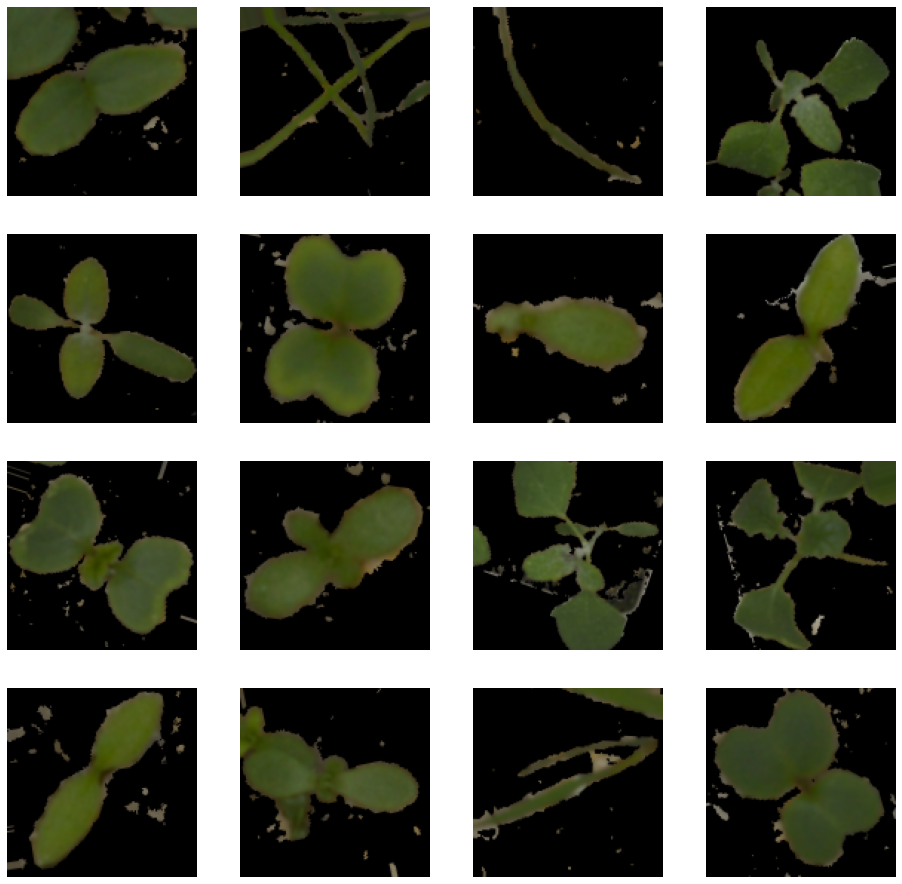

In [155]:
images, labels = next(train_generator)
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    ax.axis('off')

In [156]:

'''
# Intializing a sequential model
model3 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model3.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model3.add(MaxPooling2D((2, 2), padding = 'same'))
model3.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model3.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model3.add(Dense(16, activation='relu'))
model3.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model3.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model3.summary()
'''

# initialized a sequential model
model3 = Sequential()
# adding first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of images
model3.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
# adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding second conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model3.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding third conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model3.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model3.add(Dropout(0.3))
model3.add(BatchNormalization())
# adding forth conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model3.add(Dropout(0.3))
model3.add(BatchNormalization())
model3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model3.add(Flatten())
# adding first fully connected dense layer with 1024 neurons 
model3.add(Dense(64, activation = "relu"))
model3.add(BatchNormalization())
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2a.add(Dropout(0.5))
# adding second fully connected dense layer with 512 neurons 
model3.add(Dense(32, activation = "relu"))
model3.add(BatchNormalization())
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2a.add(Dropout(0.5))

# adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem with 12 classes.
model3.add(Dense(12, activation = "softmax"))

optimizer = Adam(lr=0.01)
model3.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
model3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [157]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5,min_lr=0.0001,mode='auto')

history3 = model3.fit(train_generator,
                    epochs=epochs,
                    steps_per_epoch=batch_size, #X_train_normalized.shape[0], 
                    verbose=1,
                    validation_data=validation_generator.next(),
                    callbacks=[reduce_lr],use_multiprocessing=True)

Epoch 1/30
64/64 [==============================] - 16s 221ms/step - loss: 2.3816 - accuracy: 0.2128 - val_loss: 19.4490 - val_accuracy: 0.0938 - lr: 0.0100
Epoch 2/30
64/64 [==============================] - 14s 221ms/step - loss: 2.0579 - accuracy: 0.3380 - val_loss: 14.8050 - val_accuracy: 0.1094 - lr: 0.0100
Epoch 3/30
64/64 [==============================] - 14s 222ms/step - loss: 1.9788 - accuracy: 0.3572 - val_loss: 7.5769 - val_accuracy: 0.1094 - lr: 0.0100
Epoch 4/30
64/64 [==============================] - 15s 222ms/step - loss: 1.9176 - accuracy: 0.3762 - val_loss: 2.9411 - val_accuracy: 0.2344 - lr: 0.0100
Epoch 5/30
64/64 [==============================] - 15s 226ms/step - loss: 1.9375 - accuracy: 0.3936 - val_loss: 1.8944 - val_accuracy: 0.3594 - lr: 0.0100
Epoch 6/30
64/64 [==============================] - 14s 221ms/step - loss: 1.7278 - accuracy: 0.4576 - val_loss: 1.4984 - val_accuracy: 0.5469 - lr: 0.0100
Epoch 7/30
64/64 [==============================] - 14s 220ms/

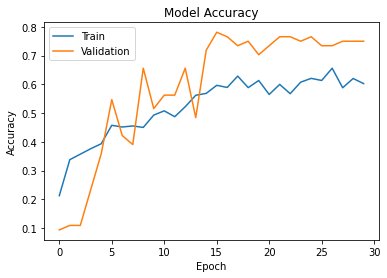

In [158]:
plotModelAccuracy(history3)

In [159]:
accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 0.8076 - accuracy: 0.8232 - 515ms/epoch - 34ms/step


In [160]:
# Here we would get the output as probablities for each category
y_pred=model3.predict(X_test_normalized)

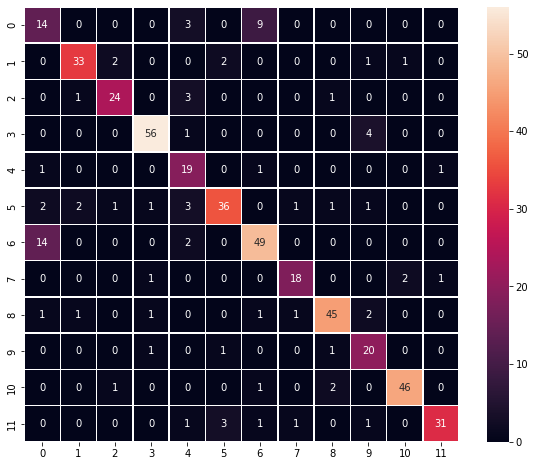

              precision    recall  f1-score   support

           0       0.44      0.54      0.48        26
           1       0.89      0.85      0.87        39
           2       0.86      0.83      0.84        29
           3       0.93      0.92      0.93        61
           4       0.59      0.86      0.70        22
           5       0.86      0.75      0.80        48
           6       0.79      0.75      0.77        65
           7       0.86      0.82      0.84        22
           8       0.90      0.87      0.88        52
           9       0.69      0.87      0.77        23
          10       0.94      0.92      0.93        50
          11       0.94      0.82      0.87        38

    accuracy                           0.82       475
   macro avg       0.81      0.82      0.81       475
weighted avg       0.84      0.82      0.83       475



In [161]:
printConfusionMatrixAndReport(y_pred)

### Model 4
Let us try Transfer Learning (VGG16) with Data Agumentation


In [79]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

In [80]:
# Loading VGG16 model 
#vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (128,128,3))
from tensorflow.keras.applications import ResNet50
vgg_model = ResNet50(weights='imagenet', include_top = False, input_shape = (128,128,3))
vgg_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']      

In [81]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [82]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_1 False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1_2_con

In [83]:
# Initializing the model
model4 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model4.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model4.add(Flatten())

# Adding a dense input layer
model4.add(Dense(32, activation='relu'))
# Adding dropout 
model4.add(Dropout(0.2))
# Adding second input layer
model4.add(Dense(32, activation='relu'))
# Adding output layer
model4.add(Dense(12, activation='softmax'))

# Compiling the model
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Summary of the model
model4.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 32)                1048608   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 12)                396       
                                                                 
Total params: 24,637,772
Trainable params: 1,050,060
Non

In [84]:
history4 = model4.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=1,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=batch_size,#X_train_normalized.shape[0], 
                    validation_data=validation_generator.next(),
                    verbose=1, callbacks=[es, mc],use_multiprocessing=True)

Epoch 1/30
64/64 [==============================] - ETA: 0s - loss: 2.4792 - accuracy: 0.1131
Epoch 1: val_accuracy did not improve from 0.68750
64/64 [==============================] - 18s 234ms/step - loss: 2.4792 - accuracy: 0.1131 - val_loss: 2.5080 - val_accuracy: 0.0156
Epoch 2/30
64/64 [==============================] - ETA: 0s - loss: 2.4372 - accuracy: 0.1320
Epoch 2: val_accuracy did not improve from 0.68750
64/64 [==============================] - 14s 220ms/step - loss: 2.4372 - accuracy: 0.1320 - val_loss: 2.5663 - val_accuracy: 0.0156
Epoch 3/30
64/64 [==============================] - ETA: 0s - loss: 2.4266 - accuracy: 0.1377
Epoch 3: val_accuracy did not improve from 0.68750
64/64 [==============================] - 14s 222ms/step - loss: 2.4266 - accuracy: 0.1377 - val_loss: 2.5215 - val_accuracy: 0.0156
Epoch 4/30
64/64 [==============================] - ETA: 0s - loss: 2.4188 - accuracy: 0.1327
Epoch 4: val_accuracy did not improve from 0.68750
64/64 [=================

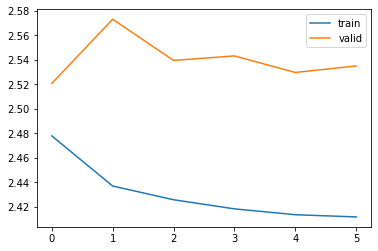

In [84]:
plotLossCurves(model4, history4)

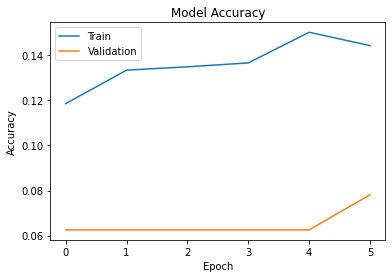

In [85]:
plotModelAccuracy(history4)

**Observations**

We can see from the above plot that the training accuracy of the model was good but the validation accuracy was not good.
The model seems to overfit on the data.


### Evaluating the model on test data

In [86]:
accuracy = model4.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 2.3998 - accuracy: 0.1305 - 1s/epoch - 95ms/step


### Generating the predictions using test data

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model4.predict(X_test_normalized)
y_pred

array([[1.18015688e-02, 2.78451629e-02, 1.47377327e-01, ...,
        3.30988057e-02, 6.94308504e-02, 8.36686268e-02],
       [2.76181061e-04, 2.32615426e-01, 3.40877771e-02, ...,
        8.40626135e-02, 3.91925156e-01, 3.81158404e-02],
       [3.16706970e-02, 4.19569155e-03, 3.58190350e-02, ...,
        1.24888830e-02, 6.25183387e-03, 5.47026992e-02],
       ...,
       [2.67330883e-03, 7.63494000e-02, 1.17534600e-01, ...,
        1.17419586e-02, 1.12640969e-02, 3.32882434e-01],
       [3.23375192e-04, 4.70931083e-02, 1.20170586e-01, ...,
        9.52189788e-02, 1.56191856e-01, 5.33091836e-02],
       [7.09633008e-02, 5.09826792e-03, 1.07226968e-01, ...,
        5.19906264e-03, 3.95259308e-03, 8.50821659e-02]], dtype=float32)

### Plotting the Confusion Matrix
- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

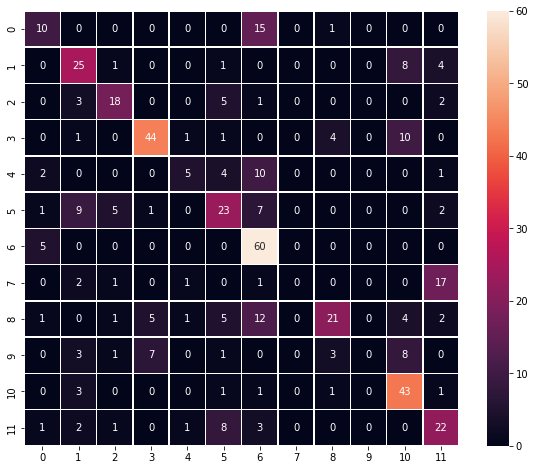

              precision    recall  f1-score   support

           0       0.50      0.38      0.43        26
           1       0.52      0.64      0.57        39
           2       0.64      0.62      0.63        29
           3       0.77      0.72      0.75        61
           4       0.56      0.23      0.32        22
           5       0.47      0.48      0.47        48
           6       0.55      0.92      0.69        65
           7       0.00      0.00      0.00        22
           8       0.70      0.40      0.51        52
           9       0.00      0.00      0.00        23
          10       0.59      0.86      0.70        50
          11       0.43      0.58      0.49        38

    accuracy                           0.57       475
   macro avg       0.48      0.49      0.46       475
weighted avg       0.53      0.57      0.53       475



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
printConfusionMatrixAndReport(y_pred)

**Observations**

We observe that some of the classes are not predicted correctly.
In comparison to the rest, we can see that classes 0,3, and 4 are well classified.
We can also observe that classes 1,2,5,7 and 9 are mostly misclassified.